In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [4]:
data_raw=pd.read_csv("data/bigfive_data.csv",delimiter='\t')
data_raw.info

<bound method DataFrame.info of          EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0         4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1         3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2         2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3         2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0  ...   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0  ...   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0  ...   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0  ...   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0  ...   

                    dateload  screenw  scre

In [5]:
data = data_raw.copy()
pd.options.display.max_columns = 150
data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)
print('Number of participants: ', len(data))
data.head()


Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [6]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}
csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [7]:

def vis_questions(groupname, questions, color):
    plt.figure(figsize=(60,60))
    for i in range(0,9):
        plt.subplot(10,3,i+1)
        plt.hist(data[groupname[i]], bins=20, color= color, alpha=.5)
        plt.title(questions[groupname[i]], fontsize=38)

In [8]:
# print('Q&As Related to Conscientious Personality')
# vis_questions(CSN, csn_questions, '#7C2D00')

In [9]:
# print('Q&As Related to Extroversion Personality')
# vis_questions(EXT, ext_questions, '#00447C')

In [10]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
# This (scaler ) is created just for sake of ease of calculation for clustering 
df = df.dropna(axis=0)
df_sample = df

df_sample

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,0.2,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.6,0.4,0.4,1.0,0.4,0.8,0.4,0.6,0.4,0.8,0.6,0.8,0.6,0.8,0.6,0.4,0.4,0.8,0.8,0.4,0.8,0.8,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,0.4,0.6,0.8,0.2,0.6,0.2,0.4,0.2,0.6,0.2,0.2,0.8,0.2,1.0,0.2,1.0,0.6,0.8,1.0,0.6,0.6,0.4,1.0,0.6,0.6,0.2,0.6,0.6,1.0,0.6,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,0.8,0.8,0.8,0.4,0.4,0.4,0.4,0.4,0.2,0.6,0.2,0.8,0.2,0.8,0.4,0.8,0.2,0.8,0.8,0.6,0.8,0.4,0.4,0.4,0.6,0.6,0.8,0.4,0.8,0.4,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,0.6,0.6,0.6,0.4,0.6,0.4,0.4,0.4,0.8,0.6,0.4,0.8,0.6,0.8,0.4,0.8,0.4,0.8,0.6,0.8,0.4,0.8,0.8,0.8,0.2,0.4,0.4,0.6,0.2,0.8,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,0.2,1.0,1.0,0.6,0.2,0.2,0.2,0.2,0.6,0.4,0.2,1.0,0.2,1.0,0.2,0.6,0.2,1.0,1.0,0.6,1.0,0.2,1.0,0.2,0.6,0.2,1.0,0.2,1.0,1.0,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,0.8,0.4,0.8,0.6,0.8,0.6,0.6,0.6,0.6,0.6,0.8,0.6,0.6,0.6,0.8,0.6,0.8,0.6,0.6,0.6,1.0,0.8,0.4,1.0,0.4,0.8,0.4,0.8,0.8,0.8,0.4,0.6,0.6,0.6,0.8,0.8,0.8,0.4,0.6,0.6,0.4,0.4,0.8,0.6,0.8,0.4,0.8,0.4,0.4,0.8
1015337,0.8,0.6,0.8,0.6,0.6,0.6,0.8,0.8,0.6,0.6,0.8,0.6,1.0,0.2,1.0,1.0,0.8,0.8,0.8,1.0,0.4,0.8,0.2,0.8,0.6,1.0,0.6,0.6,1.0,0.6,0.6,0.4,0.6,0.8,0.6,0.6,0.4,0.6,0.4,0.6,0.8,0.2,1.0,0.2,1.0,0.2,0.6,0.8,1.0,0.8
1015338,0.8,0.4,0.8,0.6,1.0,0.2,0.8,0.4,0.8,0.8,0.6,0.4,0.8,0.6,0.4,0.4,0.8,0.4,0.8,0.2,0.6,1.0,1.0,0.6,0.4,0.6,0.4,0.8,0.6,1.0,0.8,1.0,0.6,1.0,0.2,1.0,0.2,0.8,0.2,0.8,1.0,0.2,1.0,0.2,0.8,0.2,1.0,1.0,0.8,1.0
1015339,0.4,0.8,0.6,0.8,0.4,0.4,0.2,0.8,0.4,0.8,0.8,0.6,0.8,0.4,0.8,0.8,0.4,0.4,0.8,0.8,0.4,0.6,0.4,0.8,0.6,0.8,0.4,0.8,0.8,0.6,0.8,0.4,0.8,0.4,0.4,0.4,0.8,0.4,0.8,0.8,1.0,0.4,0.8,0.4,0.6,0.4,0.8,1.0,1.0,0.6


In [ ]:
# # Visualize the elbow
# from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

# kmeans = KMeans()
# visualizer = KElbowVisualizer(kmeans, k=(2,15))
# visualizer.fit(df_sample)
# visualizer.poof()

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
# from sklearn.metrics import silhouette_score

# sil_scores = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(df_sample)
#     labels = kmeans.labels_
#     sil_scores.append(silhouette_score(df_sample, labels))
#     print("i")

# # วาดกราฟ Silhouette Score
# plt.figure(figsize=(8, 6))
# plt.plot(range(2, 10), sil_scores, marker='o')
# plt.title('Silhouette Score')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.show()


In [ ]:
# from sklearn.metrics import davies_bouldin_score

# db_scores = []
# for k in range(2, 15):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(df_sample)
#     labels = kmeans.labels_
#     db_scores.append(davies_bouldin_score(df_sample, labels))

# # วาดกราฟ Davies-Bouldin Index
# plt.figure(figsize=(8, 6))
# plt.plot(range(2, 15), db_scores, marker='o')
# plt.title('Davies-Bouldin Index')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Davies-Bouldin Index')
# plt.show()

In [12]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

n_label = 9
result = []
n_runs = 100

traits = {
    'Extroversion': ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10'],
    'Agreeableness': ['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10'],
    'Conscientiousness': ['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10'],
    'Neuroticism': ['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10'],
    'Openness': ['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']
}

for run in range(n_runs):
    # I define 5 clusters and fit my model
    kmeans = KMeans(n_clusters=n_label)
    k_fit = kmeans.fit(df_sample)

    # Predicting the Clusters
    pd.options.display.max_columns = 10

    #labels_ is used to identify Labels of each point
    predictions = k_fit.labels_
    df_sample['Clusters'] = predictions
    # df_sample.head(10)

    # คำนวณค่าเฉลี่ยในแต่ละกลุ่ม
    cluster_trait_means = {}
    for trait, columns in traits.items():
        cluster_trait_means[trait] = df_sample[columns].mean(axis=1).groupby(df_sample['Clusters']).mean()


    # สร้าง DataFrame แสดงค่าเฉลี่ย
    cluster_means = pd.DataFrame(cluster_trait_means)

    cluster_means.index = range(n_label)

    # Convert the DataFrame to a numpy array
    array = cluster_means.values.T  # Transpose to have clusters as columns and traits as rows

    result.append(array)
    # print(cluster_means)

    

KeyboardInterrupt: 

In [ ]:
df_sample

df.head(5)

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,0.8,0.2,1.0,0.4,1.0,...,1.0,0.6,0.8,1.0,0
1,0.6,1.0,0.6,0.8,0.6,...,0.8,0.4,1.0,0.6,3
2,0.4,0.6,0.8,0.8,0.6,...,1.0,0.6,0.8,0.8,3
3,0.4,0.4,0.4,0.6,0.8,...,0.8,0.8,0.6,0.6,5
4,0.6,0.6,0.6,0.6,1.0,...,1.0,0.6,1.0,1.0,4


In [ ]:
average_values = np.mean(result, axis=0)

df_result = pd.DataFrame(average_values)
df_result.index = ['Extroversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']
df_result.columns = [f'Clusters {i}' for i in range(n_label)]

df_result

,Clusters 0,Clusters 1,Clusters 2,Clusters 3,Clusters 4,Clusters 5,Clusters 6,Clusters 7,Clusters 8
Extroversion,0.595345,0.601525,0.601901,0.604688,0.605054,0.585124,0.593928,0.565105,0.584134
Agreeableness,0.620232,0.628042,0.627309,0.628477,0.632455,0.611958,0.618875,0.590054,0.609921
Conscientiousness,0.613071,0.620691,0.619628,0.623474,0.627158,0.604215,0.615874,0.587605,0.605021
Neuroticism,0.591909,0.606221,0.591205,0.592210,0.607807,0.586112,0.587024,0.585668,0.581969
Openness,0.640365,0.645827,0.647472,0.651797,0.653884,0.632001,0.650146,0.615521,0.636721


In [ ]:
categories = ["Extroversion", "Agreeableness", "Conscientiousness", "Neuroticism", "Openness"]
df = pd.DataFrame(df_result, index=categories)

scaled_df = df.apply(lambda row: (row - row.min()) / (row.max() - row.min()), axis=1)

scaled_df

,Clusters 0,Clusters 1,Clusters 2,Clusters 3,Clusters 4,Clusters 5,Clusters 6,Clusters 7,Clusters 8
Extroversion,0.756969,0.911645,0.921065,0.990841,1.0,0.501121,0.721494,0.000000,0.476327
Agreeableness,0.711718,0.895925,0.878625,0.906163,1.0,0.516577,0.679716,0.000000,0.468532
Conscientiousness,0.643848,0.836476,0.809620,0.906851,1.0,0.419950,0.714696,0.000000,0.440327
Neuroticism,0.384715,0.938623,0.357452,0.396363,1.0,0.160339,0.195649,0.143142,0.000000
Openness,0.647581,0.789961,0.832845,0.945575,1.0,0.429576,0.902556,0.000000,0.552601


In [ ]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_sample)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-3.554741,-0.685905,0
1,-0.441537,-0.049463,3
2,-0.461867,-0.180674,3
3,1.550835,0.077503,5
4,0.455013,-1.053981,4


Text(0.5, 1.0, 'Personality Clusters after PCA')

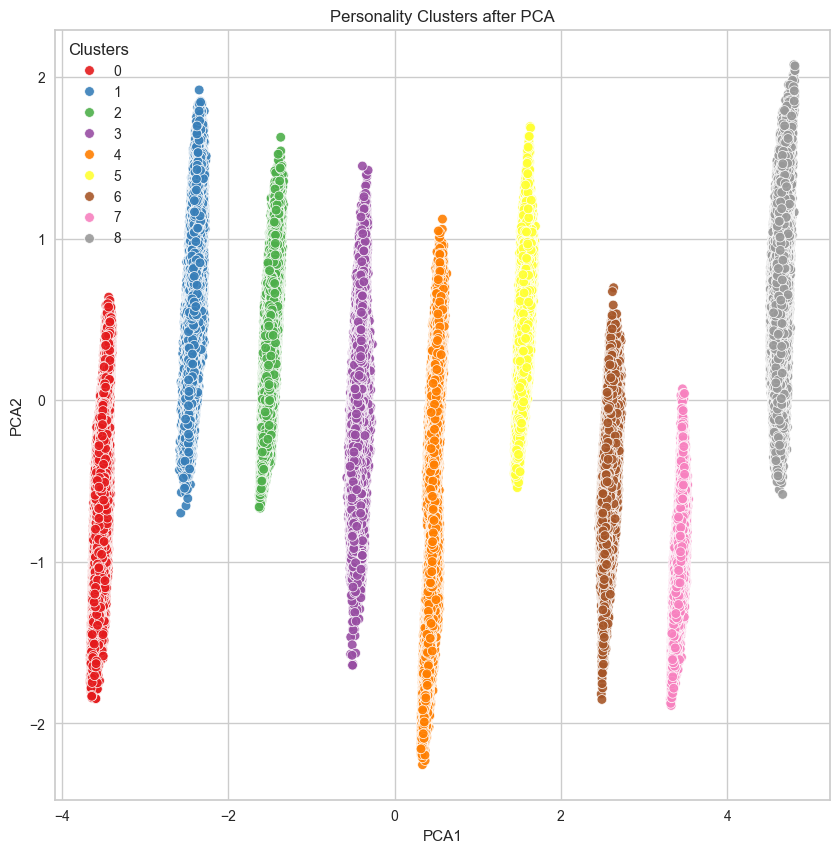

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set1', alpha=0.9)
plt.title('Personality Clusters after PCA')

In [ ]:
# cluster_labels = {
#     0: "Stable and Open",
#     1: "Emotionally Sensitive and Open",
#     2: "Conscientious and Open",
#     3: "Organized and Emotionally Stable",
#     4: "Emotionally Sensitive and Responsible"
# }

# # เพิ่ม Label ลงใน DataFrame
# df_sample['Clusters_Label'] = df_sample['Clusters'].map(cluster_labels)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import seaborn as sns
import pickle

In [ ]:
X = df_sample
y = df_sample['Clusters']

In [ ]:
def train_model(model,param,X_train, X_test, y_train, y_test,model_name):

    

    # Apply GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param, cv=5, n_jobs=-1, verbose=2)

    # Fit the model to training data
    grid_search.fit(X_train, y_train)
    
    # Print best parameters from GridSearchCV
    print("Best parameters found: ", grid_search.best_params_)

    # Evaluate the model with best parameters
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred_test = best_model.predict(X_test)

    # Print classification report and accuracy
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average="weighted")
    recall = recall_score(y_test, y_pred_test, average="weighted")
    f1 = f1_score(y_test, y_pred_test, average="weighted")
    cm = confusion_matrix(y_test, y_pred_test)
    print("==============================")
    print(f"         {model_name}         ")
    print("==============================")
    print("Accuracy:  {:.2f}%".format(accuracy * 100))
    print("Precision:  {:.2f}%".format(precision * 100))
    print("Recall:  {:.2f}%".format(recall * 100))
    print("F1 Score:  {:.2f}%".format(f1 * 100))


    labels = sorted(y_test.unique())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig,ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap='viridis', ax=ax)
    ax.grid(False)
    plt.show()

    return best_model

X = df_sample.drop('Clusters', axis=1)
y = df_sample['Clusters'] 


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
         Random Forest         
Accuracy:  70.20%
Precision:  71.77%
Recall:  70.20%
F1 Score:  69.19%


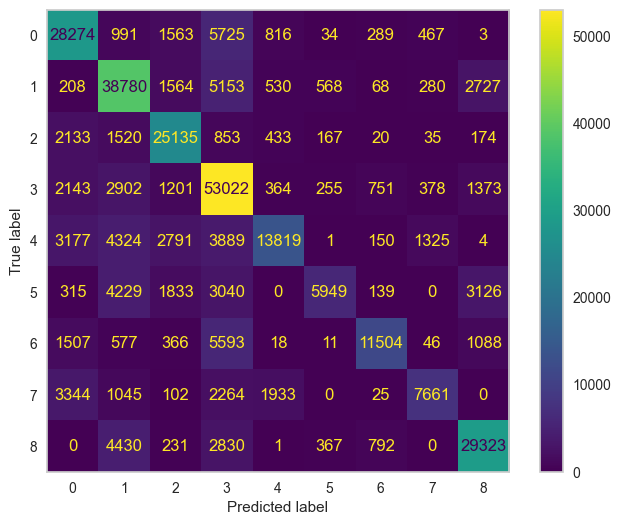

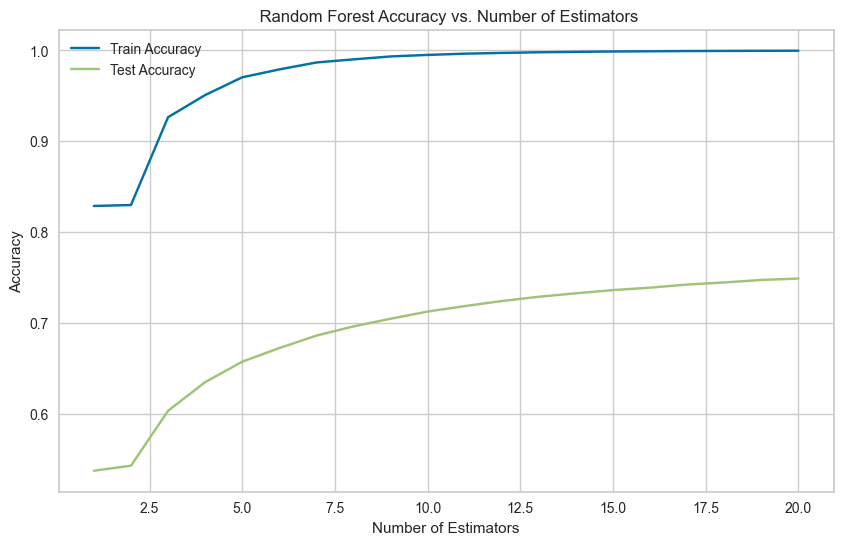

In [ ]:
# Create RandomForest model
forest_model = RandomForestClassifier(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for GridSearchCV
param_grid_forest = {
    'n_estimators': [ 100],  # Number of trees
    'max_depth': [ 10 ],  # Depth of trees
    'min_samples_split': [10],  # Minimum samples to split a node
    'min_samples_leaf': [1],  # Minimum samples in a leaf
    'bootstrap': [True]  # Whether to use bootstrap samples
}

forest = train_model(forest_model,param_grid_forest,X_train, X_test, y_train, y_test,'Random Forest')

train_accuracies_forest = []
test_accuracies_forest = []
n_estimators_list = range(1,21)

for n in n_estimators_list:
    x_forest = RandomForestClassifier(n_estimators=n, random_state=42)
    x_forest.fit(X_train, y_train)
    train_accuracies_forest.append(accuracy_score(y_train, x_forest.predict(X_train)))
    test_accuracies_forest.append(accuracy_score(y_test, x_forest.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_accuracies_forest, label="Train Accuracy")
plt.plot(n_estimators_list, test_accuracies_forest, label="Test Accuracy")
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title(" Random Forest"+" Accuracy vs. Number of Estimators")
plt.legend()
plt.show()

# with open('forest_model.pkl', 'wb') as forest_big5:
#     pickle.dump(forest, forest_big5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': None, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}
         XGBoost         
Accuracy:  79.40%
Precision:  79.35%
Recall:  79.40%
F1 Score:  79.20%


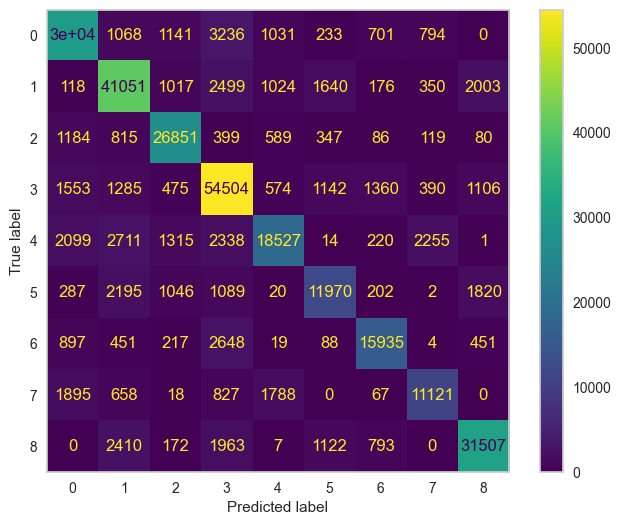

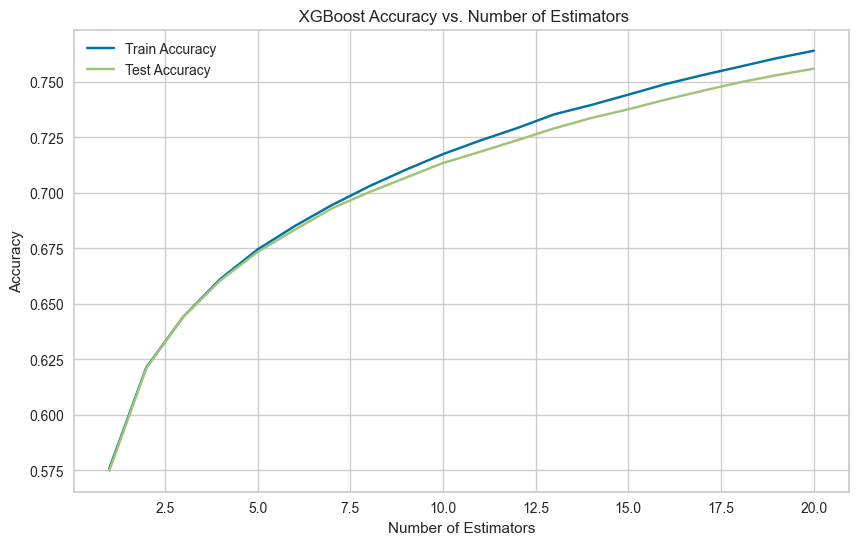

In [ ]:
import xgboost as xgb

# Create BGBoost model
xgb_model = xgb.XGBClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [100],  # Number of trees to build
    'learning_rate': [ 0.1],  # Step size shrinkage used in updates
    'max_depth': [None],  # Maximum depth of a tree
    'min_child_weight': [1],  # Minimum sum of weights of all observations needed in a child
    'subsample': [1],  # Fraction of samples used for fitting each tree
    'colsample_bytree': [1.0],  # Fraction of features used for tree building
}

XGBoost = train_model(xgb_model,param_grid_xgb,X_train, X_test, y_train, y_test,'XGBoost')

train_accuracies_xgb = []
test_accuracies_xgb = []
n_estimators_list = range(1,21)

for n in n_estimators_list:
    x_xgb =  xgb.XGBClassifier(n_estimators=n, random_state=42)
    x_xgb.fit(X_train, y_train)
    train_accuracies_xgb.append(accuracy_score(y_train, x_xgb.predict(X_train)))
    test_accuracies_xgb.append(accuracy_score(y_test, x_xgb.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_accuracies_xgb, label="Train Accuracy")
plt.plot(n_estimators_list, test_accuracies_xgb, label="Test Accuracy")
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title(" XGBoost"+" Accuracy vs. Number of Estimators")
plt.legend()
plt.show()

# with open('xgb_model.pkl', 'wb') as xgboost_big5:
#     pickle.dump(XGBoost, xgboost_big5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
         Decision Tree         
Accuracy:  58.66%
Precision:  58.64%
Recall:  58.66%
F1 Score:  58.42%


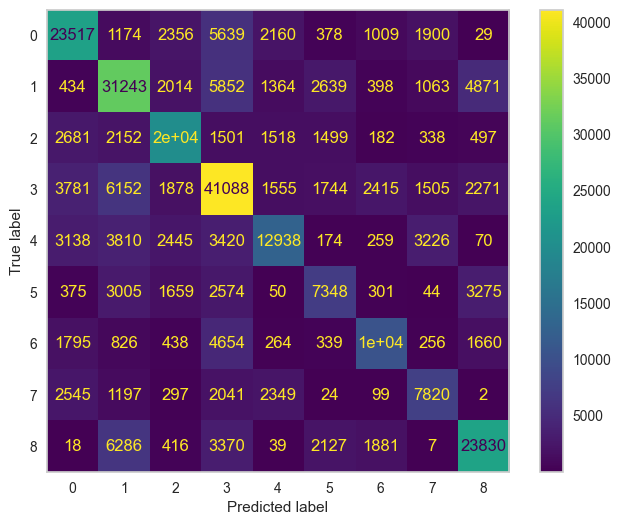

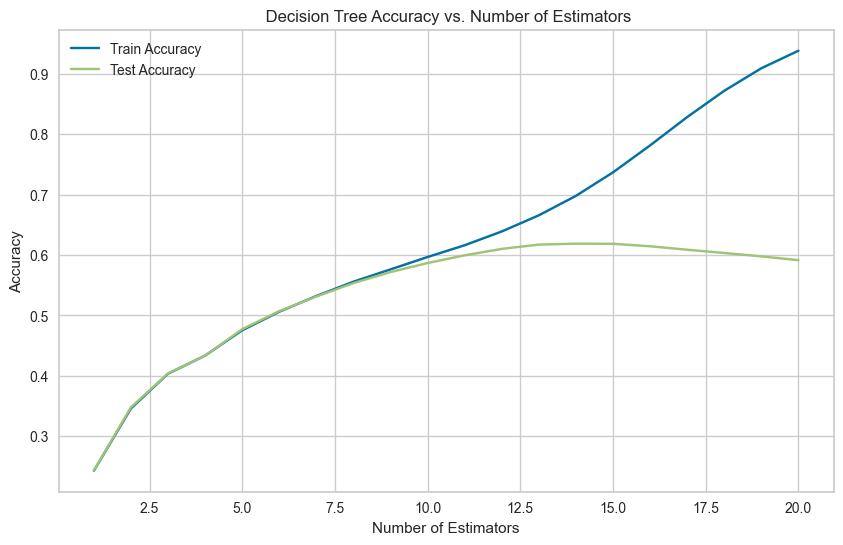

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create BGBoost model
tree_model = DecisionTreeClassifier(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for GridSearchCV
param_grid_tree = {
    'criterion': ['gini'],  # Criterion for splitting nodes (Gini Impurity or Entropy)
    'max_depth': [ 10],  # Maximum depth of the tree (None means nodes are expanded until all leaves are pure)
    'min_samples_split': [2],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [ 5],  # Minimum number of samples required to be at a leaf node

}

tree = train_model(tree_model,param_grid_tree,X_train, X_test, y_train, y_test,'Decision Tree')

train_accuracies_tree = []
test_accuracies_tree = []
max_depth_list = range(1,21)

for depth in max_depth_list:
    x_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    x_tree.fit(X_train, y_train)
    train_accuracies_tree.append(accuracy_score(y_train, x_tree.predict(X_train)))
    test_accuracies_tree.append(accuracy_score(y_test, x_tree.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(max_depth_list, train_accuracies_tree, label="Train Accuracy")
plt.plot(max_depth_list, test_accuracies_tree, label="Test Accuracy")
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title(" Decision Tree"+" Accuracy vs. Number of Estimators")
plt.legend()
plt.show()

# with open('tree_model.pkl', 'wb') as tree_big5:
#     pickle.dump(tree, tree_big5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}
Best Cross-Validation Score: 0.8232730552932388
Accuracy:  82.63%
Precision:  82.94%
Recall:  82.63%
F1 Score:  82.53%

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83     38162
           1       0.80      0.85      0.82     49878
           2       0.86      0.87      0.86     30470
           3       0.80      0.91      0.85     62389
           4       0.83      0.77      0.80     29480
           5       0.79      0.64      0.71     18631
           6       0.90      0.72      0.80     20710
           7       0.82      0.76      0.79     16374
           8       0.91      0.82      0.86     37974

    accuracy                           0.83    304068
   macro avg       0.83      0.80      0.81    304068
weighted avg       0.83      0.83      0.83    304068



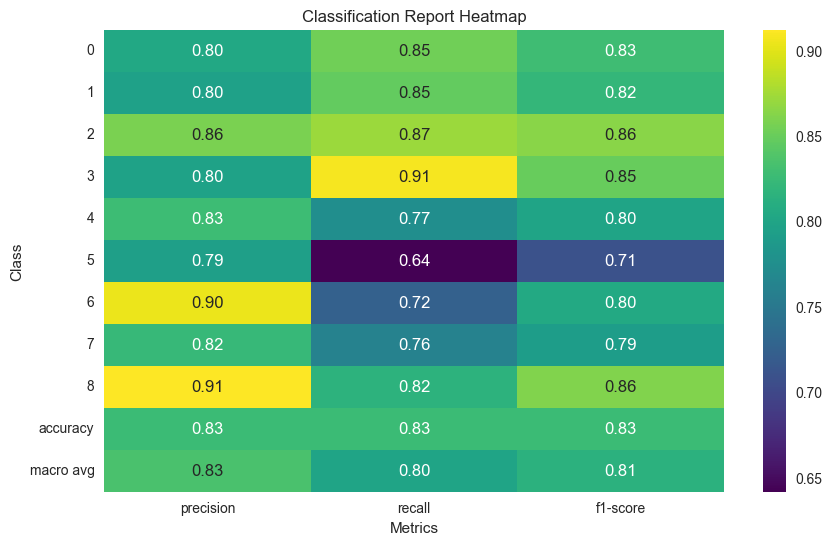

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_model = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [20],  # จำนวนเพื่อนบ้าน (k)
    'weights': ['uniform'],  # วิธีคำนวณน้ำหนัก
    'metric': ['euclidean']  # วิธีคำนวณระยะทาง
}

grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:  {:.2f}%".format(accuracy * 100))
print("Precision:  {:.2f}%".format(precision * 100))
print("Recall:  {:.2f}%".format(recall * 100))
print("F1 Score:  {:.2f}%".format(f1 * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()
metrics_to_plot = report_df.iloc[:-1, :-1]  # ลบค่า accuracy, support
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_to_plot, annot=True, cmap='viridis', fmt=".2f", cbar=True)
plt.title("Classification Report Heatmap")
plt.ylabel("Class")
plt.xlabel("Metrics")
plt.show()

# with open('knn_model.pkl', 'wb') as knn_big5:
#     pickle.dump(best_knn, knn_big5)

In [ ]:
data = data_raw.copy()
pd.options.display.max_columns = 150
data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)
print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [ ]:
data = data.drop(columns = ['EXT6','EXT9','EXT10','EST5','EST8','EST9','EST10','AGR5','AGR7','AGR9','CSN3','CSN5','OPN4','OPN5','OPN6','OPN8','OPN9'])
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT7,EXT8,EST1,EST2,EST3,EST4,EST6,EST7,AGR1,AGR2,AGR3,AGR4,AGR6,AGR8,AGR10,CSN1,CSN2,CSN4,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN7,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,5.0,2.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,5.0,2.0,4.0,3.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,5.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,2.0,5.0,2.0,3.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,5.0,5.0,4.0,3.0,3.0,2.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,4.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,1.0,3.0,4.0,4.0,4.0,2.0,2.0,2.0,1.0,4.0,1.0,4.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,5.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,4.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,5.0,1.0,5.0,3.0,5.0,3.0,5.0,1.0,1.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,KE


In [ ]:
data[['EXT2','EXT4','EXT8','EST2','EST4','AGR1','AGR3','CSN2','CSN4','CSN6','CSN8']] = -data[['EXT2','EXT4','EXT8','EST2','EST4','AGR1','AGR3','CSN2','CSN4','CSN6','CSN8']]

In [ ]:
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT7,EXT8,EST1,EST2,EST3,EST4,EST6,EST7,AGR1,AGR2,AGR3,AGR4,AGR6,AGR8,AGR10,CSN1,CSN2,CSN4,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN7,OPN10,country
0,4.0,-1.0,5.0,-2.0,5.0,5.0,-2.0,1.0,-4.0,4.0,-2.0,2.0,2.0,-2.0,5.0,-2.0,4.0,3.0,4.0,4.0,3.0,-4.0,-2.0,-4.0,4.0,-2.0,4.0,4.0,5.0,1.0,4.0,5.0,5.0,GB
1,3.0,-5.0,3.0,-4.0,3.0,2.0,-5.0,2.0,-3.0,4.0,-1.0,1.0,2.0,-1.0,4.0,-1.0,5.0,5.0,4.0,3.0,3.0,-2.0,-3.0,-1.0,3.0,-3.0,5.0,3.0,1.0,2.0,4.0,4.0,3.0,MY
2,2.0,-3.0,4.0,-4.0,3.0,1.0,-3.0,4.0,-4.0,4.0,-2.0,2.0,2.0,-1.0,4.0,-1.0,4.0,4.0,4.0,3.0,4.0,-2.0,-2.0,-3.0,4.0,-2.0,4.0,2.0,5.0,1.0,2.0,5.0,4.0,GB
3,2.0,-2.0,2.0,-3.0,4.0,2.0,-4.0,3.0,-3.0,3.0,-2.0,2.0,2.0,-2.0,4.0,-3.0,4.0,4.0,4.0,4.0,2.0,-4.0,-4.0,-2.0,2.0,-3.0,1.0,4.0,4.0,2.0,5.0,4.0,3.0,GB
4,3.0,-3.0,3.0,-3.0,5.0,3.0,-5.0,1.0,-5.0,5.0,-3.0,1.0,1.0,-1.0,5.0,-1.0,5.0,3.0,5.0,3.0,5.0,-1.0,-1.0,-1.0,5.0,-1.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,-2.0,4.0,-3.0,4.0,3.0,-3.0,4.0,-3.0,3.0,-3.0,3.0,4.0,-5.0,4.0,-2.0,5.0,4.0,4.0,4.0,2.0,-3.0,-3.0,-4.0,4.0,-2.0,3.0,3.0,2.0,2.0,4.0,4.0,4.0,US
1015337,4.0,-3.0,4.0,-3.0,3.0,4.0,-4.0,4.0,-3.0,5.0,-1.0,5.0,4.0,-2.0,4.0,-1.0,4.0,5.0,3.0,3.0,3.0,-2.0,-4.0,-3.0,2.0,-3.0,2.0,3.0,4.0,1.0,5.0,3.0,4.0,US
1015338,4.0,-2.0,4.0,-3.0,5.0,4.0,-2.0,3.0,-2.0,4.0,-3.0,2.0,4.0,-3.0,5.0,-5.0,3.0,3.0,4.0,5.0,4.0,-5.0,-5.0,-5.0,1.0,-4.0,1.0,4.0,5.0,1.0,5.0,5.0,5.0,US
1015339,2.0,-4.0,3.0,-4.0,2.0,1.0,-4.0,4.0,-3.0,4.0,-2.0,4.0,2.0,-2.0,3.0,-2.0,4.0,4.0,4.0,3.0,4.0,-2.0,-2.0,-2.0,4.0,-2.0,4.0,4.0,5.0,2.0,4.0,4.0,3.0,US


In [ ]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
# This (scaler ) is created just for sake of ease of calculation for clustering 
df = df.dropna(axis=0)
df_sample = df


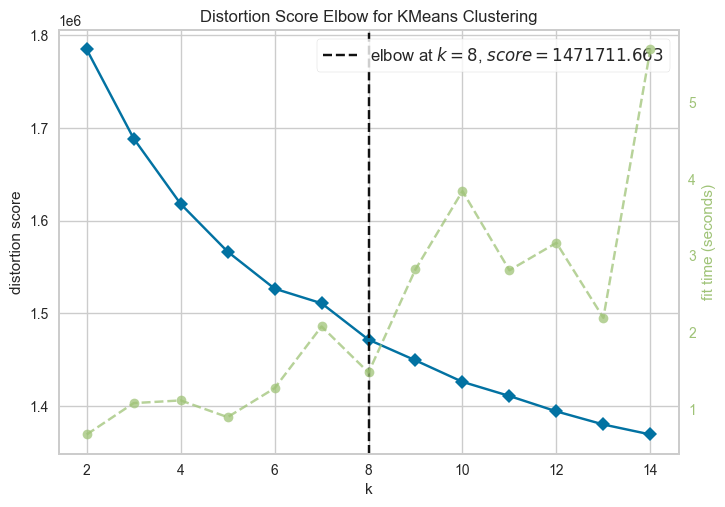

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

In [ ]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

n_label = 9
result = []
n_runs = 100

traits = {
    'Extroversion': ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5',  'EXT7', 'EXT8'],
    'Agreeableness': ['AGR1', 'AGR2', 'AGR3', 'AGR4',  'AGR6',  'AGR8',  'AGR10'],
    'Conscientiousness': ['CSN1', 'CSN2',  'CSN4',  'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10'],
    'Neuroticism': ['EST1', 'EST2', 'EST3', 'EST4',  'EST6', 'EST7'],
    'Openness': ['OPN1', 'OPN2', 'OPN3',  'OPN7',  'OPN10']
}

for run in range(n_runs):
    # I define 5 clusters and fit my model
    kmeans = KMeans(n_clusters=n_label)
    k_fit = kmeans.fit(df_sample)

    # Predicting the Clusters
    pd.options.display.max_columns = 10

    #labels_ is used to identify Labels of each point
    predictions = k_fit.labels_
    df_sample['Clusters'] = predictions
    # df_sample.head(10)

    # คำนวณค่าเฉลี่ยในแต่ละกลุ่ม
    cluster_trait_means = {}
    for trait, columns in traits.items():
        cluster_trait_means[trait] = df_sample[columns].mean(axis=1).groupby(df_sample['Clusters']).mean()


    # สร้าง DataFrame แสดงค่าเฉลี่ย
    cluster_means = pd.DataFrame(cluster_trait_means)

    cluster_means.index = range(n_label)

    # Convert the DataFrame to a numpy array
    array = cluster_means.values.T  # Transpose to have clusters as columns and traits as rows

    result.append(array)
    # print(cluster_means)

In [ ]:
df_sample

df.head(5)

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN2,OPN3,OPN7,OPN10,Clusters
0,0.8,0.8,1.0,0.6,1.0,...,0.2,0.8,1.0,1.0,6
1,0.6,0.0,0.6,0.2,0.6,...,0.4,0.8,0.8,0.6,2
2,0.4,0.4,0.8,0.2,0.6,...,0.2,0.4,1.0,0.8,2
3,0.4,0.6,0.4,0.4,0.8,...,0.4,1.0,0.8,0.6,6
4,0.6,0.4,0.6,0.4,1.0,...,0.2,1.0,1.0,1.0,4


In [ ]:
average_values = np.mean(result, axis=0)

df_result = pd.DataFrame(average_values)
df_result.index = ['Extroversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']
df_result.columns = [f'Clusters {i}' for i in range(n_label)]

df_result

,Clusters 0,Clusters 1,Clusters 2,Clusters 3,Clusters 4,Clusters 5,Clusters 6,Clusters 7,Clusters 8
Extroversion,0.502499,0.519028,0.506279,0.486262,0.497875,0.498205,0.522499,0.497142,0.498473
Agreeableness,0.681690,0.686434,0.699415,0.673024,0.691765,0.687318,0.698171,0.686617,0.670768
Conscientiousness,0.578736,0.575984,0.571338,0.577477,0.566504,0.571395,0.575656,0.556467,0.553210
Neuroticism,0.546225,0.576442,0.588815,0.566050,0.574447,0.584875,0.552057,0.546835,0.562446
Openness,0.697346,0.697534,0.703458,0.701065,0.705401,0.698288,0.707772,0.696676,0.677442


In [ ]:
categories = ["Extroversion", "Agreeableness", "Conscientiousness", "Neuroticism", "Openness"]
df = pd.DataFrame(df_result, index=categories)

scaled_df = df.apply(lambda row: (row - row.min()) / (row.max() - row.min()), axis=1)

scaled_df

,Clusters 0,Clusters 1,Clusters 2,Clusters 3,Clusters 4,Clusters 5,Clusters 6,Clusters 7,Clusters 8
Extroversion,0.448088,0.904224,0.552377,0.000000,0.320480,0.329587,1.000000,0.300235,0.336959
Agreeableness,0.381252,0.546855,1.000000,0.078747,0.732963,0.577735,0.956588,0.553265,0.000000
Conscientiousness,1.000000,0.892180,0.710203,0.950696,0.520830,0.712403,0.879351,0.127595,0.000000
Neuroticism,0.000000,0.709486,1.000000,0.465488,0.662654,0.907492,0.136922,0.014303,0.380861
Openness,0.656257,0.662453,0.857773,0.778869,0.921829,0.687304,1.000000,0.634161,0.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import seaborn as sns
import pickle

In [ ]:
X = df_sample
y = df_sample['Clusters']

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': None, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}
         XGBoost         
Accuracy:  100.00%
Precision:  100.00%
Recall:  100.00%
F1 Score:  100.00%


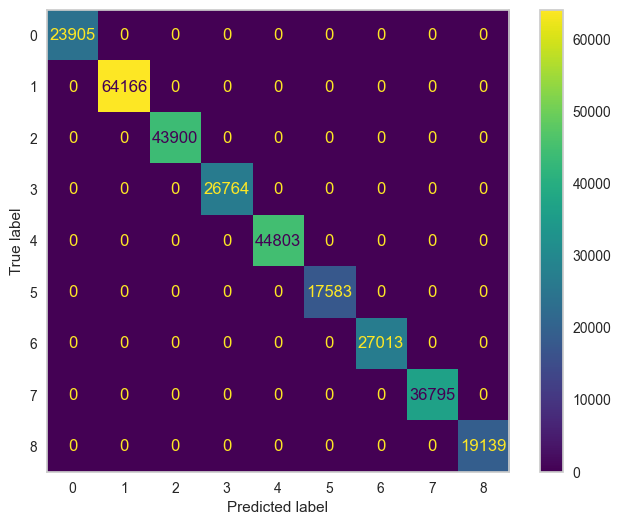

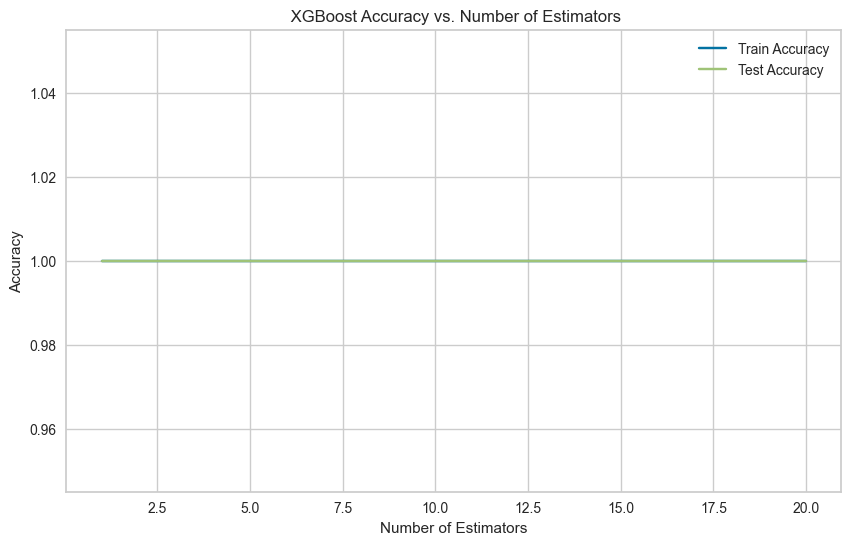

In [ ]:
import xgboost as xgb

# Create BGBoost model
xgb_model = xgb.XGBClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [100],  # Number of trees to build
    'learning_rate': [ 0.1],  # Step size shrinkage used in updates
    'max_depth': [None],  # Maximum depth of a tree
    'min_child_weight': [1],  # Minimum sum of weights of all observations needed in a child
    'subsample': [1],  # Fraction of samples used for fitting each tree
    'colsample_bytree': [1.0],  # Fraction of features used for tree building
}

XGBoost = train_model(xgb_model,param_grid_xgb,X_train, X_test, y_train, y_test,'XGBoost')

train_accuracies_xgb = []
test_accuracies_xgb = []
n_estimators_list = range(1,21)

for n in n_estimators_list:
    x_xgb =  xgb.XGBClassifier(n_estimators=n, random_state=42)
    x_xgb.fit(X_train, y_train)
    train_accuracies_xgb.append(accuracy_score(y_train, x_xgb.predict(X_train)))
    test_accuracies_xgb.append(accuracy_score(y_test, x_xgb.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_accuracies_xgb, label="Train Accuracy")
plt.plot(n_estimators_list, test_accuracies_xgb, label="Test Accuracy")
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title(" XGBoost"+" Accuracy vs. Number of Estimators")
plt.legend()
plt.show()



In [ ]:
# with open('xgb_model.pkl', 'wb') as xgboost_big5:
#     pickle.dump(XGBoost, xgboost_big5)